## ANÁLISIS EXPLORATORIO DE DATOS - EDA

El Análisis Exploratorio de Datos o en inglés Exploratory Data Analysis (EDA) es un método de análisis de los conjuntos de datos para resumir sus principales características. El EDA se utiliza para ver lo que los datos pueden decirnos antes de la tarea de modelación.

### Importar librerías y dataset

In [71]:
import pandas as pd # módulo para tratamiento de datos
import numpy as np # módulo para tratamiento de matrices
import missingno as msno # librería para tratamiento de datos perdidos
import matplotlib.pyplot as plt # módulo graficador
import seaborn as sns # módulo graficador
import plotly
import plotly.express as px
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from PIL import Image
import random

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

In [72]:
moviesDf = pd.read_csv('datasets/etl.csv', sep=';', encoding='utf-8')
moviesDf.head()

,id,title,tagline,overview,collection,genre,company,actor,director,original_language,...,popularity,vote_count,vote_average,release_date,release_month,release_day,release_year,revenue,budget,return
0,862,toy story,NaN,"led by woody, andy's toys live happily in his ...",toy story collection,"animation, comedy, family",pixar animation studios,"tom hanks, tim allen, don rickles, jim varney,...",john lasseter,en,...,21.946943,5415,7.7,1995-10-30,octubre,lunes,1995,373554033,30000000,12.451801
1,8844,jumanji,roll the dice and unleash the excitement!,when siblings judy and peter discover an encha...,NaN,"adventure, fantasy, family","tristar pictures, teitler film, interscope com...","robin williams, jonathan hyde, kirsten dunst, ...",joe johnston,en,...,17.015539,2413,6.9,1995-12-15,diciembre,viernes,1995,262797249,65000000,4.043035
2,15602,grumpier old men,still yelling. still fighting. still ready for...,a family wedding reignites the ancient feud be...,grumpy old men collection,"romance, comedy","warner bros., lancaster gate","walter matthau, jack lemmon, ann-margret, soph...",howard deutch,en,...,11.712900,92,6.5,1995-12-22,diciembre,viernes,1995,0,0,0.000000
3,31357,waiting to exhale,friends are the people who let you be yourself...,"cheated on, mistreated and stepped on, the wom...",NaN,"comedy, drama, romance",twentieth century fox film corporation,"whitney houston, angela bassett, loretta devin...",forest whitaker,en,...,3.859495,34,6.1,1995-12-22,diciembre,viernes,1995,81452156,16000000,5.090760
4,11862,father of the bride part ii,just when his world is back to normal... he's ...,just when george banks has recovered from his ...,father of the bride collection,comedy,"sandollar productions, touchstone pictures","steve martin, diane keaton, martin short, kimb...",charles shyer,en,...,8.387519,173,5.7,1995-02-10,febrero,viernes,1995,76578911,0,0.000000


### Determinar tamaño de los datos

- ¿Qué tipo de dato son las variables del conjunto de datos?

In [4]:
moviesDf.dtypes

id                     int64
title                 object
tagline               object
overview              object
collection            object
genre                 object
company               object
actor                 object
director              object
original_language     object
status                object
country               object
language              object
runtime                int64
popularity           float64
vote_count             int64
vote_average         float64
release_date          object
release_month         object
release_day           object
release_year           int64
revenue                int64
budget                 int64
return               float64
dtype: object

- ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [5]:
moviesDf.dtypes.value_counts()

object     15
int64       6
float64     3
Name: count, dtype: int64

- ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [6]:
moviesDf.shape

(45346, 24)

- ¿Existen valores nulos explícitos en el conjunto de datos?

In [7]:
moviesDf.isnull().any()

id                   False
title                False
tagline               True
overview              True
collection            True
genre                 True
company               True
actor                 True
director              True
original_language     True
status                True
country               True
language              True
runtime              False
popularity           False
vote_count           False
vote_average         False
release_date         False
release_month        False
release_day          False
release_year         False
revenue              False
budget               False
return               False
dtype: bool

- De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [8]:
moviesDf.isnull().sum()

id                       0
title                    0
tagline              24959
overview               941
collection           40968
genre                 2384
company              11847
actor                 2359
director              1007
original_language       11
status                  80
country               6209
language              3889
runtime                  0
popularity               0
vote_count               0
vote_average             0
release_date             0
release_month            0
release_day              0
release_year             0
revenue                  0
budget                   0
return                   0
dtype: int64

- ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [9]:
moviesDf.isnull().sum().sum()

94654

- ¿Cuál es la proporción de valores nulos por cada variable?

In [10]:
# Explorando la cantidad de valores nulos en %
moviesDf.isna().sum()/moviesDf.shape[0]*100

id                    0.000000
title                 0.000000
tagline              55.041238
overview              2.075155
collection           90.345345
genre                 5.257355
company              26.125788
actor                 5.202223
director              2.220703
original_language     0.024258
status                0.176421
country              13.692498
language              8.576280
runtime               0.000000
popularity            0.000000
vote_count            0.000000
vote_average          0.000000
release_date          0.000000
release_month         0.000000
release_day           0.000000
release_year          0.000000
revenue               0.000000
budget                0.000000
return                0.000000
dtype: float64

- Una revision inicial nos muestra que existen variables con mucha información faltante como son las variables: tagline, collection, company, country.

<Axes: >

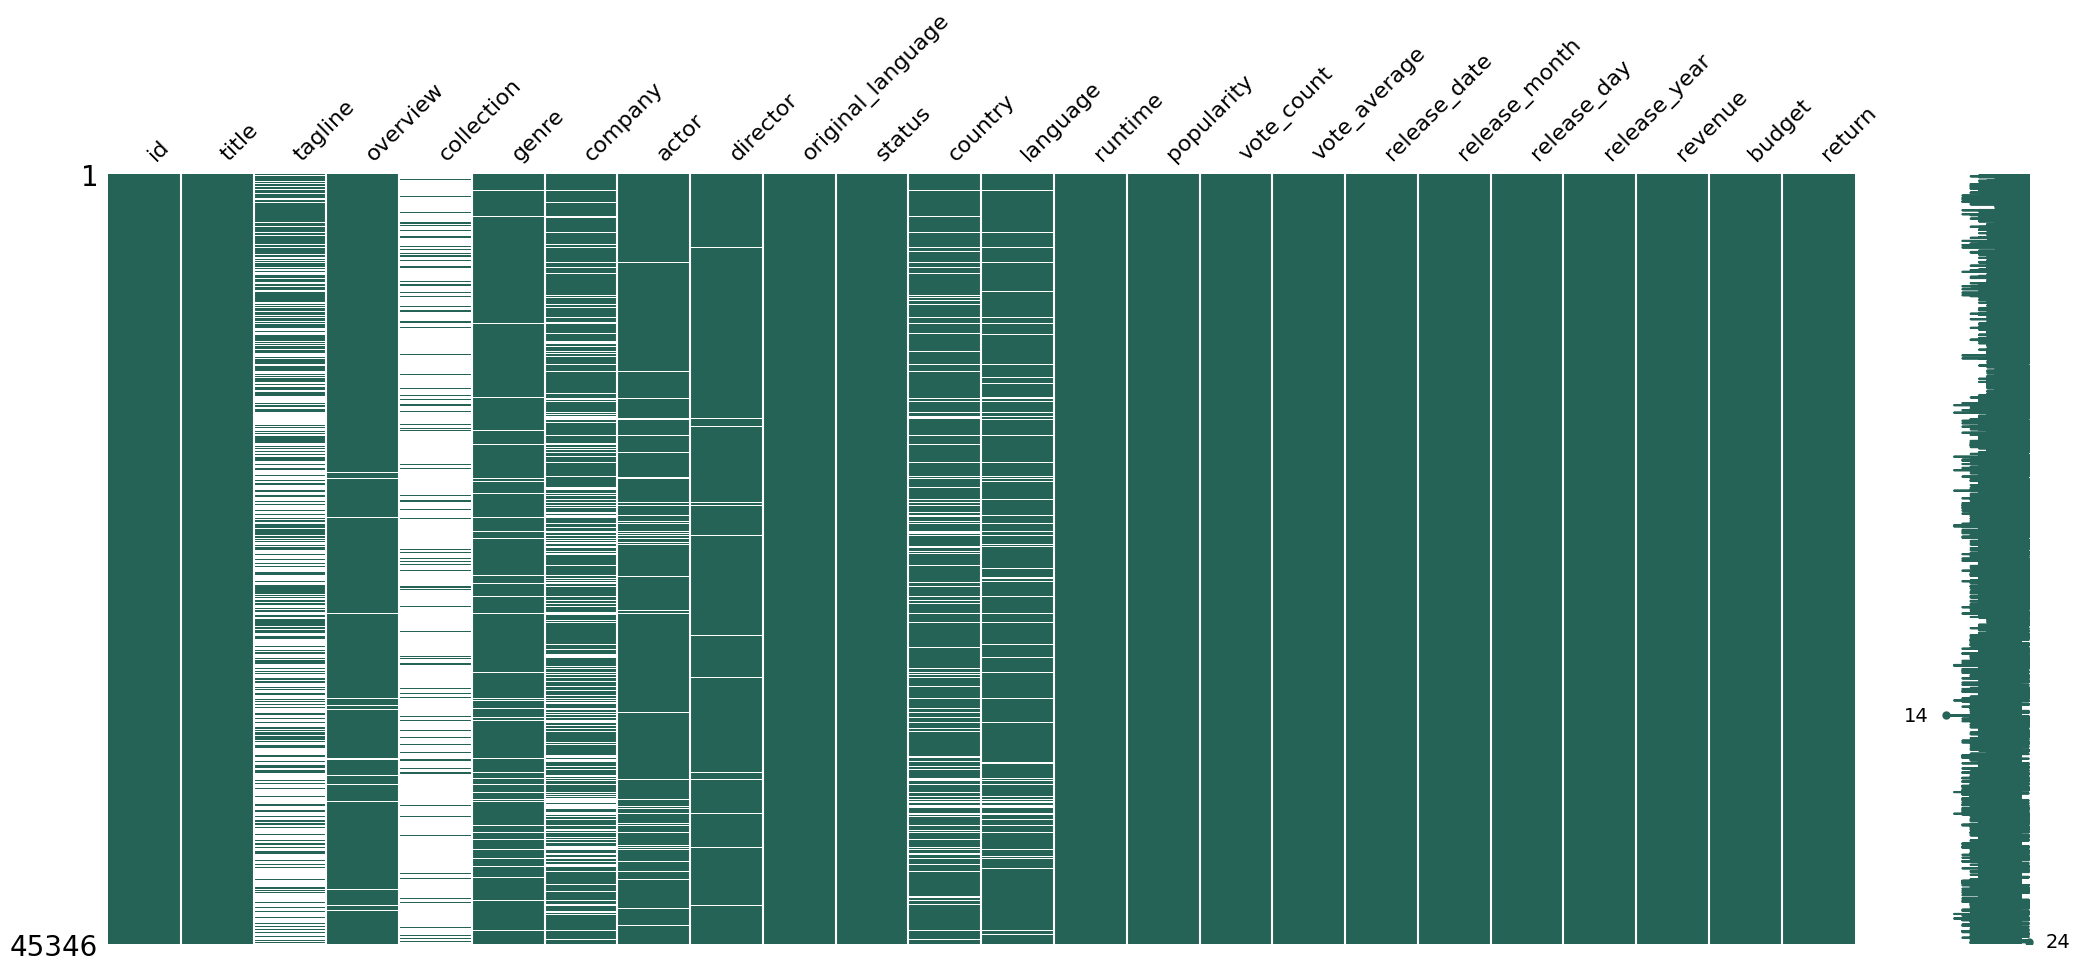

In [11]:
# Matrix missing: Mostramos una matriz de calor para visualizar las 
# variables con mayor presencia de valores nulos. Las líneas blancas 
# indican los valores faltantes en cada columna
msno.matrix(moviesDf, color = (0.1490, 0.3900, 0.3449))

<Axes: >

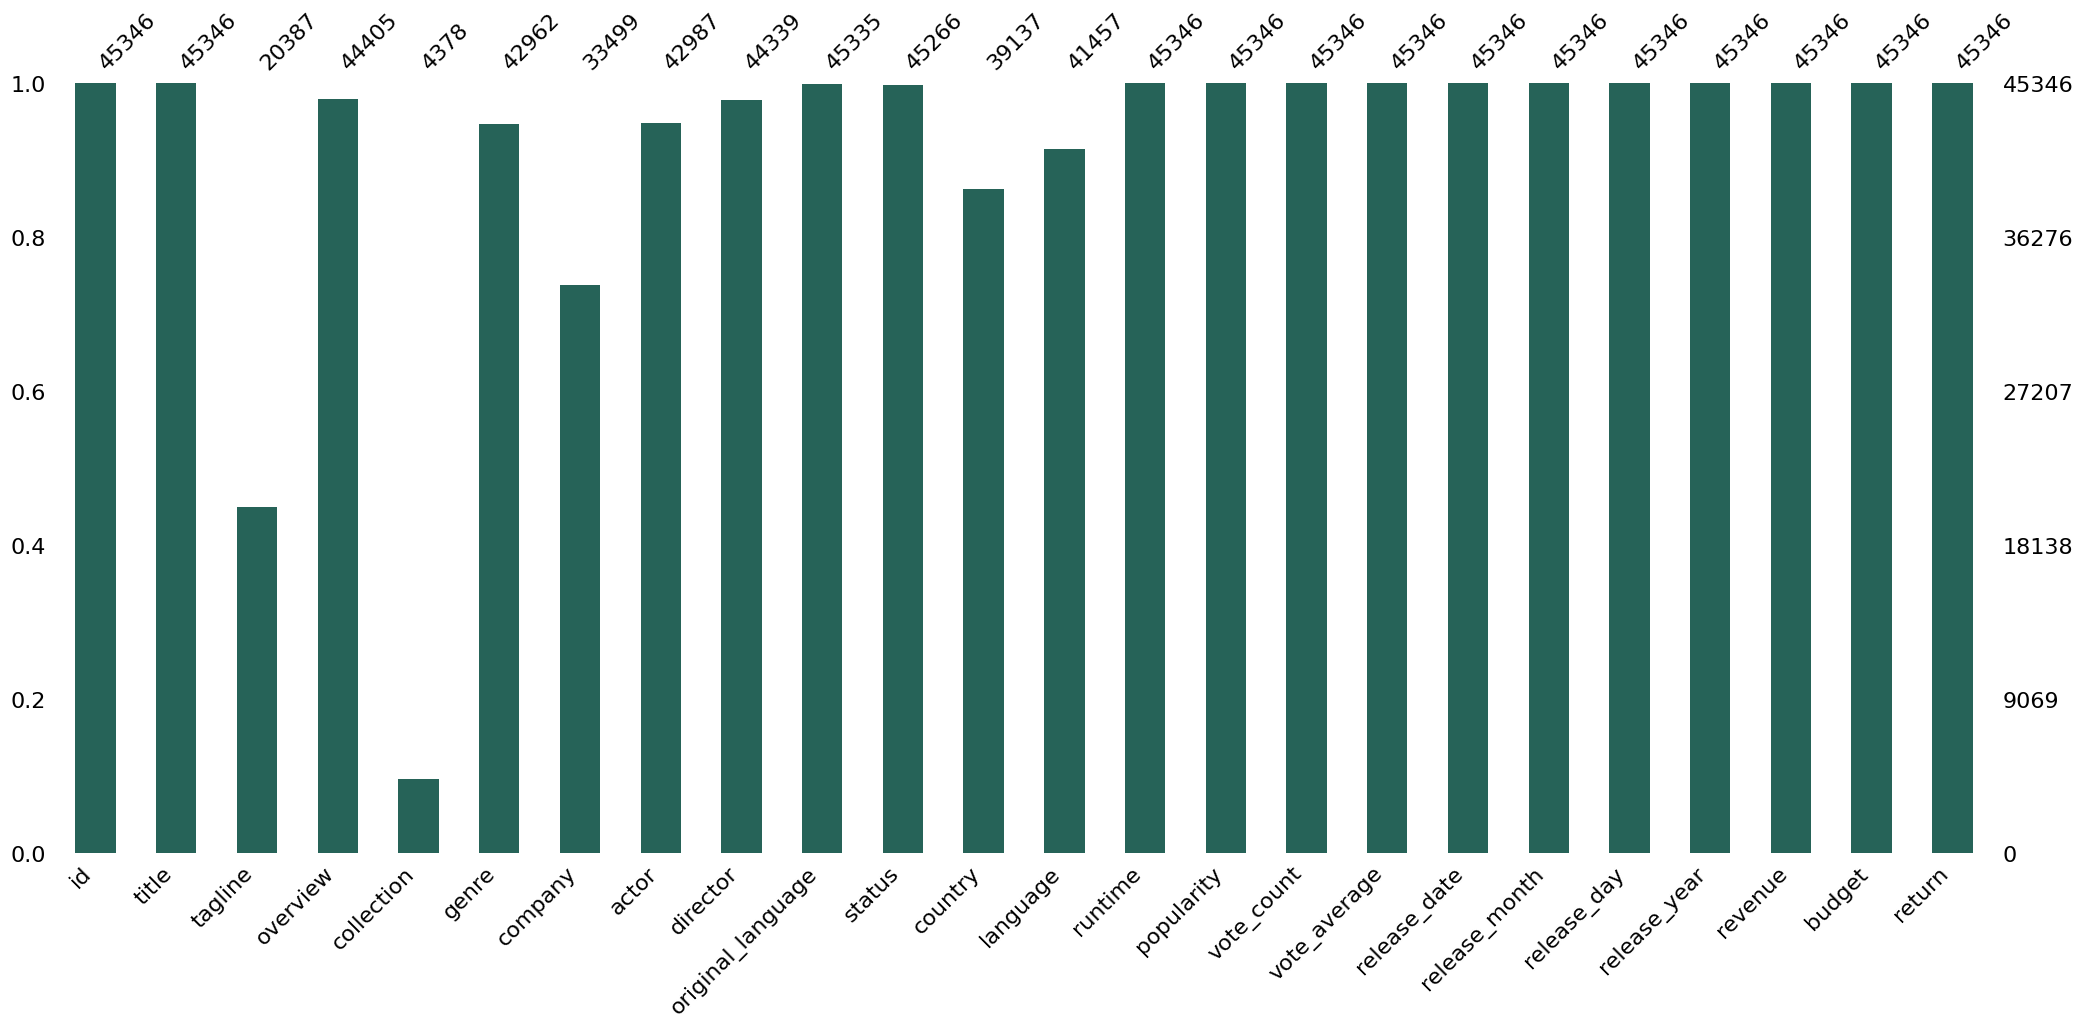

In [12]:
# Bar missing: Estas barras muestran los valores que son proporcionales 
# a los datos que no faltan en el conjunto de datos. Junto con eso, 
# también se muestra el número de valores que faltan.
msno.bar(moviesDf, color = (0.1490, 0.3900, 0.3449))

- Eliminamos las variables que no necesitamos

In [73]:
moviesDf.drop(columns=['id','tagline','collection','original_language', 'status', 'country', 'language'], inplace = True)

- Eliminamos los valores nulos

In [74]:
moviesDf.dropna(subset = ['actor','company','director','genre','overview'], inplace=True)

In [75]:
moviesDf.shape

(32095, 17)

- Eliminamos las observaciones que poseen valor 0 en budget y revenue, ya que ambas representan un valor sensible, el cual no se podria estimar e imputar. Cabe destacar que una pelicula necesita un presupuesto y el monto recaudado una vez estrenada.

In [76]:
# Comprobación de valores cero en las columnas de budget y revenue
print("Filas con valores cero en la columna budget:",moviesDf[(moviesDf['budget']==0)].shape[0])
print("Filas con valores cero en la columna revenue:",moviesDf[(moviesDf['revenue']==0)].shape[0])

Filas con valores cero en la columna budget: 24054
Filas con valores cero en la columna revenue: 25160


In [77]:
moviesDf.drop(moviesDf[moviesDf['budget'] == 0].index, inplace = True)
moviesDf.drop(moviesDf[moviesDf['revenue'] == 0].index, inplace = True)

In [78]:
moviesDf.shape

(5166, 17)

- Exportamos a un archivo .csv, el cual será la fuente de datos de entrada para la Fase 3 del proyecto:

In [79]:
moviesDf.to_csv('datasets/movies.csv', index=False, header=True, sep=';', encoding='utf-8')

### Conteos y proporciones

¿Qué estadísticos describen el conjunto de datos?

In [80]:
# Solamente las Numericas
moviesDf.describe(include=[np.number])

,runtime,popularity,vote_count,vote_average,release_year,revenue,budget,return
count,5166.000000,5166.000000,5166.000000,5166.000000,5166.000000,5.166000e+03,5.166000e+03,5.166000e+03
mean,110.211963,10.071266,760.325978,6.291773,1999.654084,9.372862e+07,3.214122e+07,5.262952e+03
std,21.413890,14.007574,1268.863209,0.891396,16.058767,1.686626e+08,4.060524e+07,2.179880e+05
min,26.000000,0.030576,0.000000,0.000000,1915.000000,1.000000e+00,1.000000e+00,5.217391e-07
25%,96.000000,5.808837,90.000000,5.800000,1994.000000,8.207480e+06,6.000000e+06,8.210310e-01
50%,106.000000,8.591536,296.000000,6.300000,2004.000000,3.227124e+07,1.800000e+07,2.098411e+00
75%,120.000000,11.846699,845.000000,6.900000,2011.000000,1.031720e+08,4.000000e+07,4.286601e+00
max,338.000000,547.488298,14075.000000,9.100000,2017.000000,2.787965e+09,3.800000e+08,1.239638e+07


In [81]:
# Solamente las Categoricas
moviesDf.describe(include=object)

,title,overview,genre,company,actor,director,release_date,release_month,release_day
count,5166,5166,5166,5166,5166,5166,5166,5166,5166
unique,5070,5165,1270,4135,5166,2356,3723,12,7
top,king kong,no overview found.,drama,paramount pictures,"tom hanks, tim allen, don rickles, jim varney,...",steven spielberg,2014-12-25,septiembre,viernes
freq,3,2,363,91,1,29,7,596,2158


### Análisis Univariado 

- Visualizamos películas por año de estreno

In [23]:
#¿En qué año se estrenó la mayor cantidad de películas?
moviesDf['release_year'].value_counts()

release_year
2011    229
2016    229
2010    225
2013    221
2015    207
       ... 
1916      1
1922      1
1929      1
1930      1
1918      1
Name: count, Length: 99, dtype: int64

<Axes: title={'center': 'Release Year'}, xlabel='release_year'>

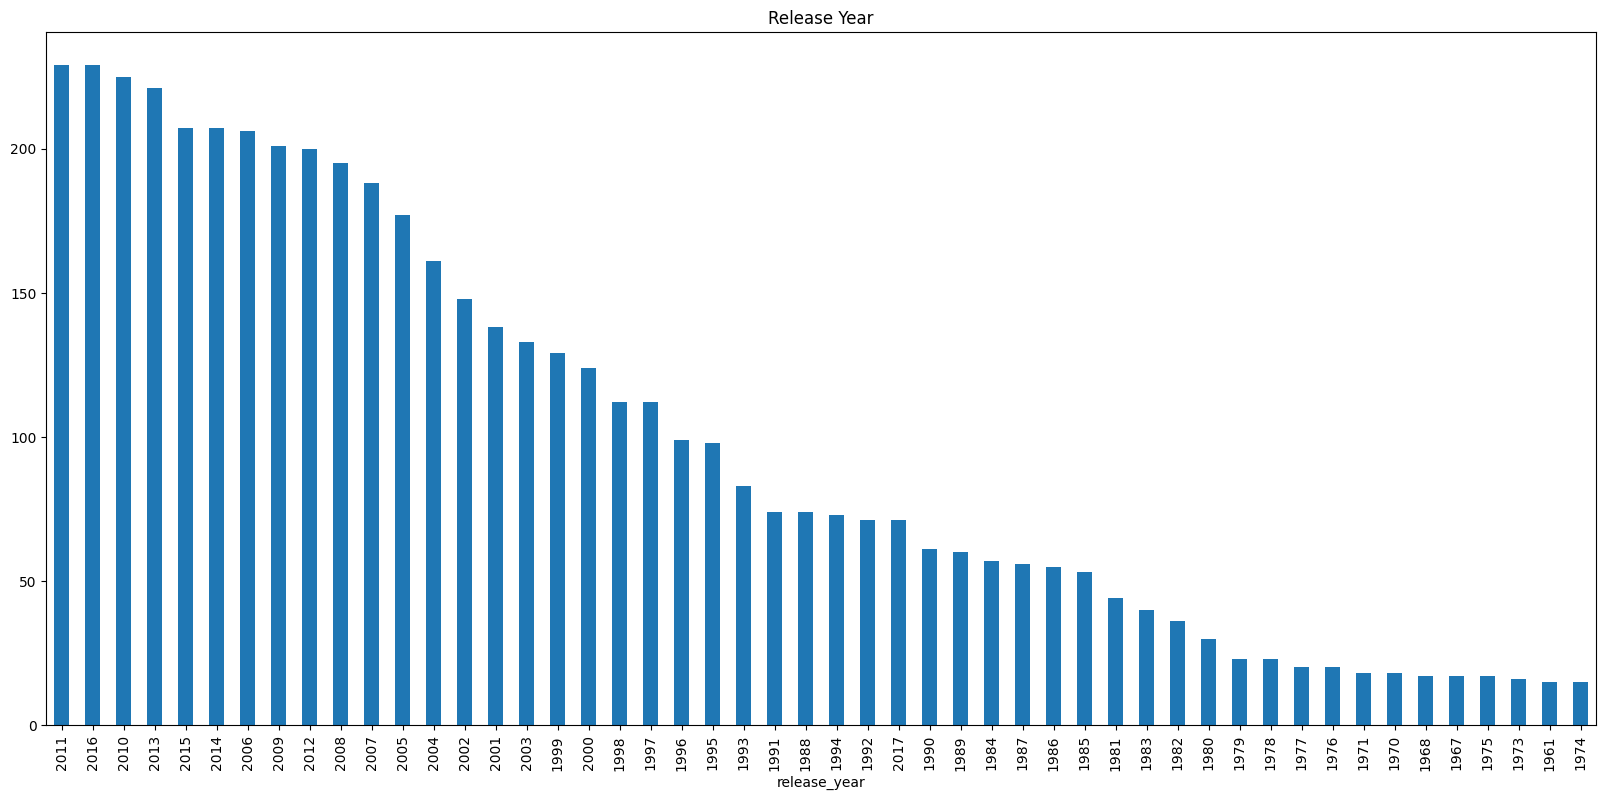

In [24]:
#Visualizamos la cantidad de películas por año
moviesDf['release_year'].value_counts()[:50].plot(kind='bar', title='Release Year', figsize=(20,9))

<Axes: >

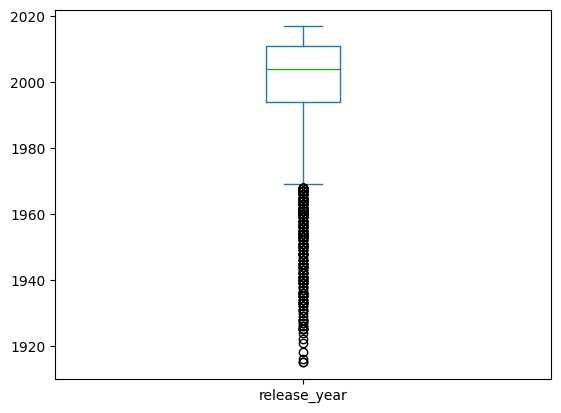

In [25]:
moviesDf['release_year'].plot(kind='box')

**En el año 2016 y 2011 se estrenaron el mayor número  de peliculas (229 en total).**

- Visualizamos películas por género

In [26]:
#¿Qué género es el más frecuente?
genres = moviesDf['genre'].str.split(", ", expand=True).stack()
genres = pd.DataFrame(genres)
genres.rename(columns={0:'genres'}, inplace=True)
genres['genres'].value_counts()

genres
drama              2472
comedy             1766
thriller           1466
action             1379
romance             969
adventure           941
crime               842
science fiction     622
horror              574
family              512
fantasy             501
mystery             440
animation           286
history             228
war                 202
music               183
western              88
documentary          42
foreign              23
tv movie              1
Name: count, dtype: int64

<Axes: ylabel='genres'>

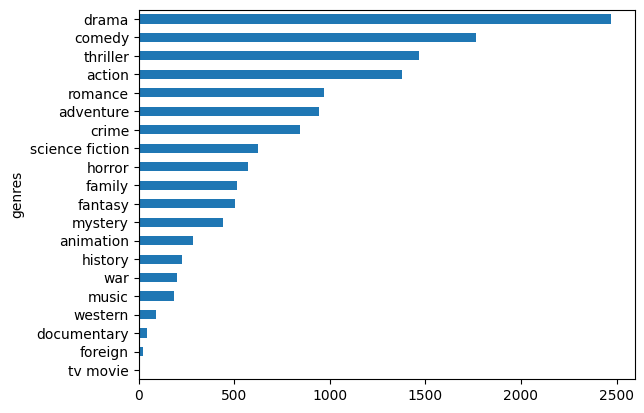

In [27]:
genres['genres'].value_counts().sort_values(ascending=True).plot.barh(x='genres')

**EL género más frecuente en el conjunto de datos es el 'Drama'**

- Visualizamos las compañías con mayor número de películas

In [28]:
#¿Cuál es la compañía con mayor número de películas?
companies = moviesDf['company'].str.split(", ", expand=True).stack()
companies = pd.DataFrame(companies)
companies.rename(columns={0:'companies'}, inplace=True)

<Axes: ylabel='companies'>

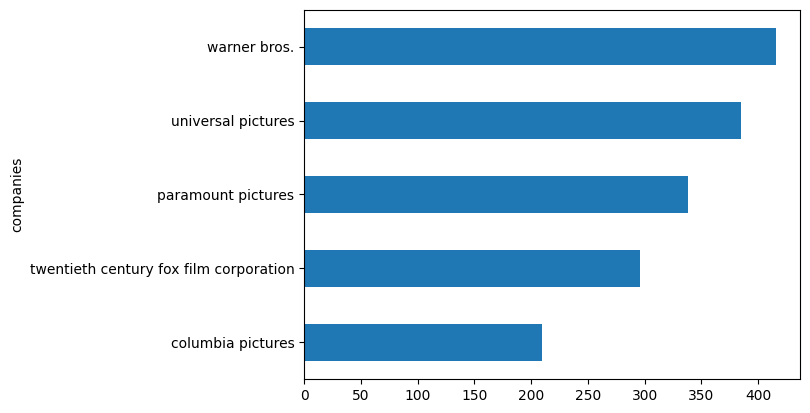

In [29]:
companies['companies'].value_counts()[:5].sort_values(ascending=True).plot.barh(x='companies')

**La compañía Warner Bros produjo el mayor número de películas (416).**

- Visualizamos los actores con mayor número de películas

In [30]:
#¿Cuál es la actor con mayor número de películas?
actors = moviesDf['actor'].str.split(", ", expand=True).stack()
actors = pd.DataFrame(actors)
actors.rename(columns={0:'actors'}, inplace=True)

<Axes: ylabel='actors'>

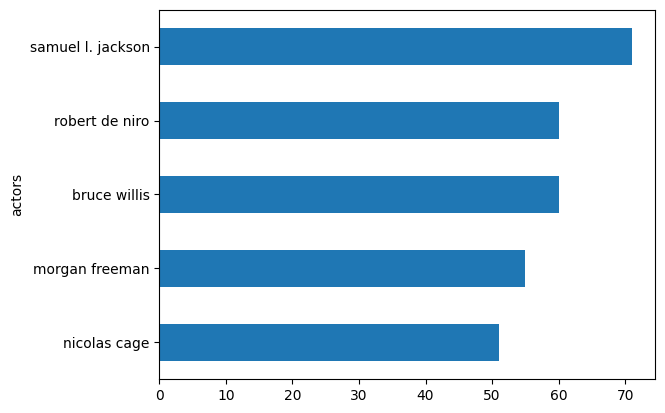

In [31]:
actors['actors'].value_counts()[1:6].sort_values(ascending=True).plot.barh(x='actors')

**El Actor Samuel L. Jackson participo en el mayor número de películas (71).**

- Visualizamos los directores con mayor número de películas

In [32]:
#¿Cuál es el director con mayor número de películas?
directors = moviesDf['director'].str.split(", ", expand=True).stack()
directors = pd.DataFrame(directors)
directors.rename(columns={0:'directors'}, inplace=True)

<Axes: ylabel='directors'>

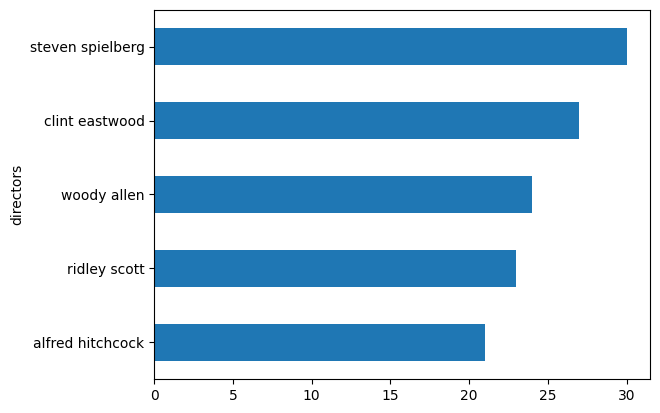

In [33]:
directors['directors'].value_counts()[0:5].sort_values(ascending=True).plot.barh(x='directors')

**El Director Steven Spielberg produjo el mayor número de películas (30).**

- Visualizamos por vote_average

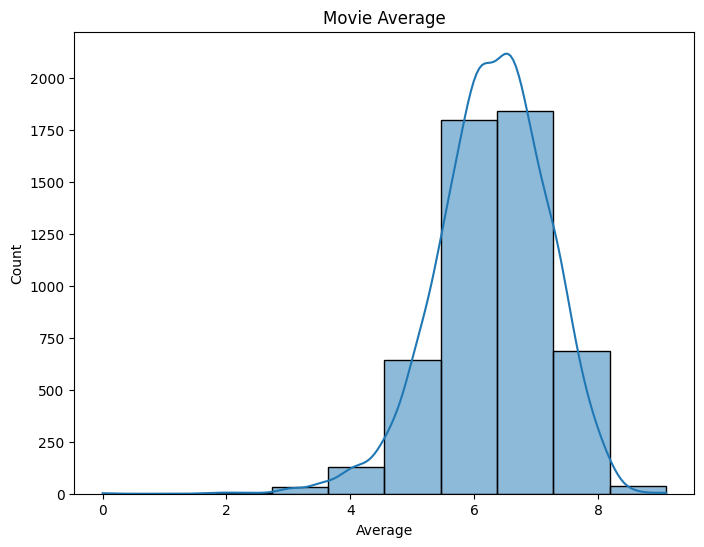

In [34]:
# ¿Cuál es la calificación promedio según los votos?
plt.figure(figsize=(8, 6))
sns.histplot(data=moviesDf, x='vote_average', bins=10, kde=True)
plt.title('Movie Average')
plt.xlabel('Average')
plt.ylabel('Count')
plt.show()

<Axes: >

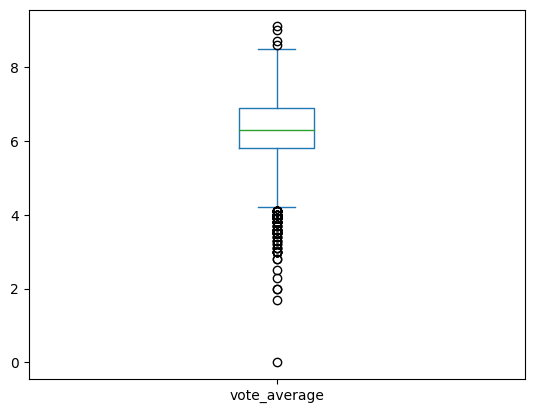

In [35]:
moviesDf['vote_average'].plot(kind='box')

**La mayoría de las películas están clasificadas en el rango de 6-7.**

- Visualizacion por runtime

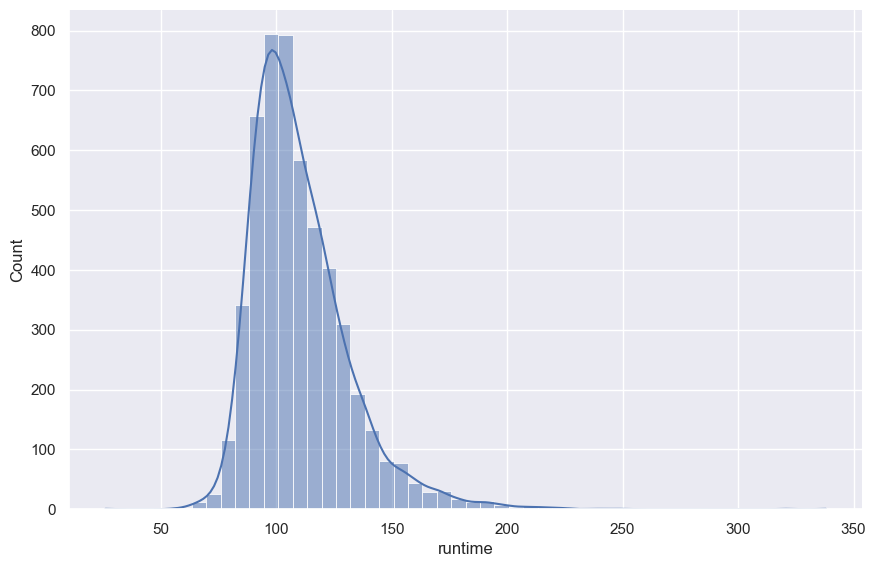

In [36]:
#¿Cuál es el promedio de duración de las películas?
sns.set_theme()
sns.displot(moviesDf['runtime'], bins=50, kde=True)
plt.gcf().set_size_inches(10, 6)

<Axes: >

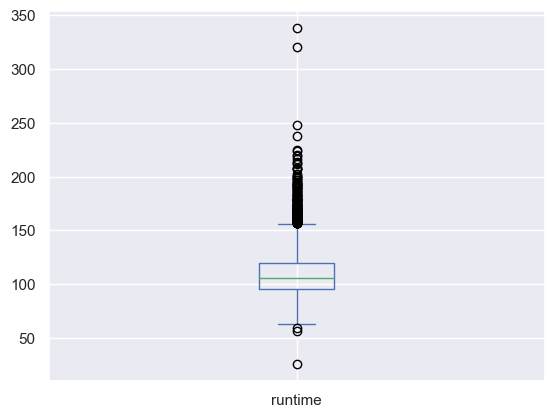

In [37]:
moviesDf['runtime'].plot(kind='box')

In [325]:
moviesDf['runtime'].mean()

110.21196283391406

**La mayoría de las películas se encuentran en un rango de tiempo de duración de 90-110 minutos.**

### Medidas de dispersion

- Valores Maximos y Minimos de las Variables

In [353]:
moviesDf.max(numeric_only=True)

runtime         3.380000e+02
popularity      5.474883e+02
vote_count      1.407500e+04
vote_average    9.100000e+00
release_year    2.017000e+03
revenue         2.787965e+09
budget          3.800000e+08
return          1.239638e+07
dtype: float64

In [354]:
moviesDf.min(numeric_only=True)

runtime         2.600000e+01
popularity      3.057600e-02
vote_count      0.000000e+00
vote_average    0.000000e+00
release_year    1.915000e+03
revenue         1.000000e+00
budget          1.000000e+00
return          5.217391e-07
dtype: float64

- Rango de las Variables

In [355]:
moviesDf.max(numeric_only=True) - moviesDf.min(numeric_only=True)

runtime         3.120000e+02
popularity      5.474577e+02
vote_count      1.407500e+04
vote_average    9.100000e+00
release_year    1.020000e+02
revenue         2.787965e+09
budget          3.800000e+08
return          1.239638e+07
dtype: float64

- Desviacion Estandar de las Variables

In [356]:
moviesDf.std(numeric_only=True)

runtime         2.141389e+01
popularity      1.400757e+01
vote_count      1.268863e+03
vote_average    8.913959e-01
release_year    1.605877e+01
revenue         1.686626e+08
budget          4.060524e+07
return          2.179880e+05
dtype: float64

- Media de las Variables

In [357]:
moviesDf.mean(numeric_only=True)

runtime         1.102120e+02
popularity      1.007127e+01
vote_count      7.603260e+02
vote_average    6.291773e+00
release_year    1.999654e+03
revenue         9.372862e+07
budget          3.214122e+07
return          5.262952e+03
dtype: float64

In [216]:
moviesDf.mean(numeric_only=True) - moviesDf.std(numeric_only=True)

runtime         6.689963e+01
popularity     -3.137209e+00
vote_count     -4.273968e+02
vote_average    4.224244e+00
release_year    1.964832e+03
revenue        -6.027735e+07
budget         -1.457804e+07
return         -8.662348e+04
dtype: float64

### Analisis Multivariable

- Visualizamos la correlación  entre las variables.

C:\Users\58424\AppData\Local\Temp\ipykernel_3036\3806371879.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



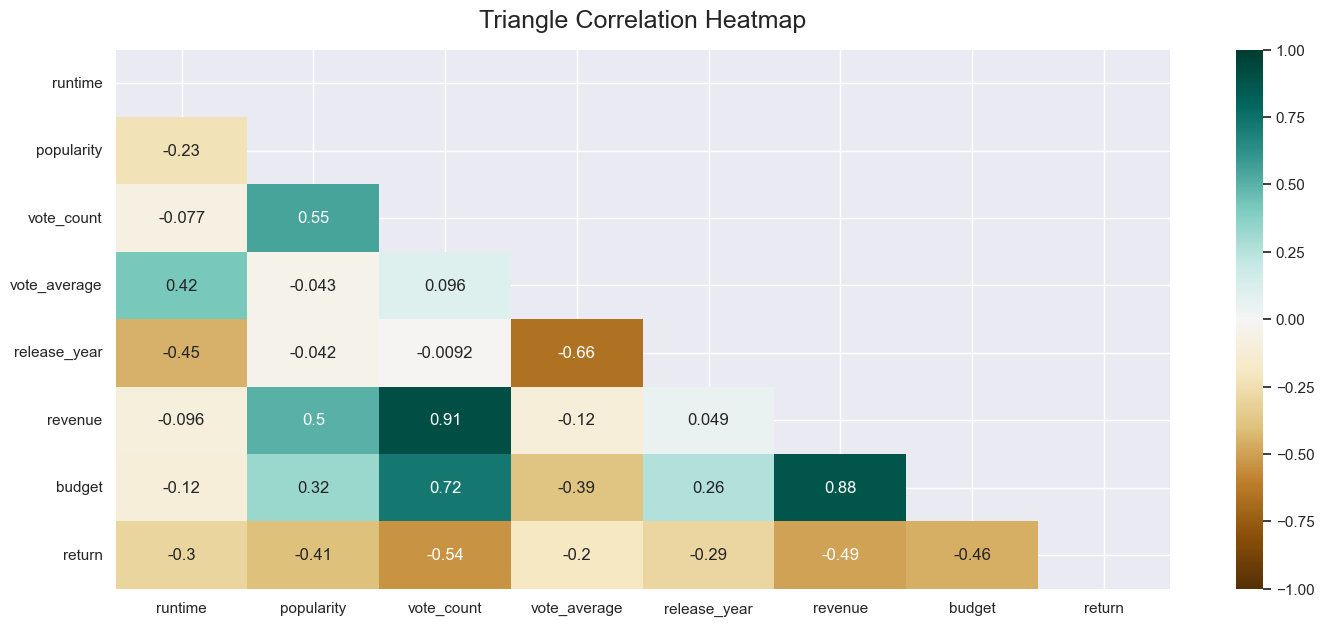

In [358]:
# Mapa de Correlación  de Variables Numericas
correlations = moviesDf.select_dtypes(include = ["number"]).corr()
plt.figure(figsize=(17, 7))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(correlations.corr(), dtype=np.bool))
heatmap = sns.heatmap(correlations.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

-  Existe una fuerte correlación entre budget (presupuesto) y revenue (ingresos). Los ingresos aumentan ligeramente a niveles más altos, pero el número de películas con presupuestos elevados parece escaso. Existe una buena posibilidad de que las películas con mayores inversiones generen mejores ingresos.
-  Los ingresos parecen estar aumentando con la popularidad. Podemos decir que si la popularidad de la película es alta, los ingresos de la película pueden ser altos.
-  El público ha votado por películas con alto tiempo de ejecución.
-  Los votos, la popularidad, los ingresos y el presupuesto tienen una correlación directa entre sí, aunque en diferentes proporciones.

1. Visualizamos las películas que obtuvieron mayores ingresos  en el 2016 y 2011.

In [47]:
movies_2016 = moviesDf[moviesDf['release_year']==2016].copy()
movies_2016_temp=movies_2016.sort_values(by='revenue',ascending = False).head(5)
display(movies_2016_temp)
px.bar(movies_2016_temp,y='revenue',x='title',text='vote_average', title='Most Revenue Movies of Year 2016')

,title,overview,genre,company,actor,director,runtime,popularity,vote_count,vote_average,release_date,release_month,release_day,release_year,revenue,budget,return
26520,captain america: civil war,"following the events of age of ultron, the col...","adventure, action, science fiction","studio babelsberg, marvel studios, walt disney...","chris evans, robert downey jr., scarlett johan...","anthony russo, joe russo",147,145.882135,7462,7.1,2016-04-27,abril,miercoles,2016,1153304495,250000000,4.613218
41393,rogue one: a star wars story,a rogue band of resistance fighters unite for ...,"action, adventure, science fiction","lucasfilm, walt disney pictures, allison shear...","felicity jones, diego luna, ben mendelsohn, do...",gareth edwards,133,36.567575,5111,7.4,2016-12-14,diciembre,miercoles,2016,1056057273,200000000,5.280286
38096,finding dory,dory is reunited with her friends nemo and mar...,"adventure, animation, comedy, family","walt disney pictures, pixar animation studios,...","ellen degeneres, albert brooks, hayden rolence...","andrew stanton, angus maclane",97,14.477677,4333,6.8,2016-06-16,junio,jueves,2016,1028570889,200000000,5.142854
36182,zootopia,"determined to prove herself, officer judy hopp...","animation, adventure, family, comedy","walt disney pictures, walt disney animation st...","ginnifer goodwin, jason bateman, shakira, idri...","byron howard, rich moore, jared bush",108,26.024868,4961,7.7,2016-02-11,febrero,jueves,2016,1023784195,150000000,6.825228
31332,the jungle book,after a threat from the tiger shere khan force...,"family, adventure, drama, fantasy","walt disney pictures, walt disney studios moti...","neel sethi, bill murray, ben kingsley, idris e...",jon favreau,106,17.432758,2977,6.7,2016-04-07,abril,jueves,2016,966550600,175000000,5.523146


In [50]:
movies_2011 = moviesDf[moviesDf['release_year']==2011].copy()
movies_2011_temp=movies_2011.sort_values(by='revenue',ascending = False).head(5)
display(movies_2011_temp)
px.bar(movies_2011_temp,y='revenue', x='title', text='vote_average', title='Most Revenue Movies of Year 2011')

,title,overview,genre,company,actor,director,runtime,popularity,vote_count,vote_average,release_date,release_month,release_day,release_year,revenue,budget,return
17418,harry potter and the deathly hallows: part 2,"harry, ron and hermione continue their quest t...","family, fantasy, adventure","warner bros., heyday films","daniel radcliffe, rupert grint, emma watson, a...",david yates,130,24.990737,6141,7.9,2011-07-07,julio,jueves,2011,1342000000,125000000,10.736000
17276,transformers: dark of the moon,sam witwicky takes his first tenuous steps int...,"action, science fiction, adventure","paramount pictures, di bonaventura pictures, i...","shia labeouf, john malkovich, ken jeong, franc...",michael bay,154,4.503505,3351,6.1,2011-06-28,junio,martes,2011,1123746996,195000000,5.762805
17107,pirates of the caribbean: on stranger tides,captain jack sparrow crosses paths with a woma...,"adventure, action, fantasy","walt disney pictures, jerry bruckheimer films,...","johnny depp, penélope cruz, ian mcshane, kevin...",rob marshall,136,27.887720,5068,6.4,2011-05-14,mayo,sabado,2011,1045713802,380000000,2.751878
18130,the twilight saga: breaking dawn - part 1,the new found married bliss of bella swan and ...,"adventure, fantasy, romance","summit entertainment, sunswept entertainment, ...","kristen stewart, robert pattinson, taylor laut...",bill condon,117,25.972500,2622,5.8,2011-03-15,marzo,martes,2011,712171856,110000000,6.474290
18269,mission: impossible - ghost protocol,in the 4th installment of the mission impossib...,"action, thriller, adventure","paramount pictures, skydance productions, bad ...","tom cruise, jeremy renner, simon pegg, paula p...",brad bird,133,14.258430,4026,6.8,2011-12-07,diciembre,miercoles,2011,694713380,145000000,4.791127


**En el 2016 el top 5 de películas con mayores ingresos  fueron: captain america: civil war, rogue one: a star wars story, finding dory,  zootopia,the jungle book. Los géneros adventure y family fueron los mas comunes, así como también walt disney pictures aparece como compañía productora.**

**En el 2016 el top 5 de películas con mayores ingresos  fueron: harry potter and the deathly hallows: part 2, transformers: dark of the moon, pirates of the caribbean: on stranger tides, the twilight saga: breaking dawn - part 1, mission: impossible - ghost protocol. Los géneros adventure y fantasy fueron los mas comunes, así como también paramount pictures aparece como compañía productora.**

3. Visualizamos las películas que obtuvieron mayores ingresos.

In [52]:
movies_Rev=moviesDf.sort_values(by='revenue',ascending = False)[0:5]
display(movies_Rev)
px.pie(movies_Rev, values='revenue', names='title', title='Movies vs Revenue')

,title,overview,genre,company,actor,director,runtime,popularity,vote_count,vote_average,release_date,release_month,release_day,release_year,revenue,budget,return
14540,avatar,"in the 22nd century, a paraplegic marine is di...","action, adventure, fantasy, science fiction","ingenious film partners, twentieth century fox...","sam worthington, zoe saldana, sigourney weaver...",james cameron,162,185.070892,12114,7.2,2009-12-10,diciembre,jueves,2009,2787965087,237000000,11.763566
26508,star wars: the force awakens,thirty years after defeating the galactic empi...,"action, adventure, science fiction, fantasy","lucasfilm, truenorth productions, bad robot","daisy ridley, john boyega, adam driver, harris...",j.j. abrams,136,31.626013,7993,7.5,2015-12-15,diciembre,martes,2015,2068223624,245000000,8.441729
1636,titanic,"84 years later, a 101-year-old woman named ros...","drama, romance, thriller","paramount pictures, twentieth century fox film...","kate winslet, leonardo dicaprio, frances fishe...",james cameron,194,26.889070,7770,7.5,1997-11-18,noviembre,martes,1997,1845034188,200000000,9.225171
17799,the avengers,when an unexpected enemy emerges and threatens...,"science fiction, action, adventure","paramount pictures, marvel studios","robert downey jr., chris evans, mark ruffalo, ...",joss whedon,143,89.887648,12000,7.4,2012-04-25,abril,miercoles,2012,1519557910,220000000,6.907081
25037,jurassic world,twenty-two years after the events of jurassic ...,"action, adventure, science fiction, thriller","universal studios, amblin entertainment, legen...","chris pratt, bryce dallas howard, irrfan khan,...",colin trevorrow,124,32.790475,8842,6.5,2015-06-09,junio,martes,2015,1513528810,150000000,10.090192


**El top 5 de películas con mayores ingresos fueron: avatar, star wars: the force awakens, titanic, the avengers y jurassic world.**

4. Visualizamos las películas que obtuvieron mayores presupuestos.

In [54]:
movies_Pre=moviesDf.sort_values(by='budget',ascending = False)[0:5]
display(movies_Pre)
px.pie(movies_Pre, values='budget', names='title', title='Movies vs Budget')

,title,overview,genre,company,actor,director,runtime,popularity,vote_count,vote_average,release_date,release_month,release_day,release_year,revenue,budget,return
17107,pirates of the caribbean: on stranger tides,captain jack sparrow crosses paths with a woma...,"adventure, action, fantasy","walt disney pictures, jerry bruckheimer films,...","johnny depp, penélope cruz, ian mcshane, kevin...",rob marshall,136,27.887720,5068,6.4,2011-05-14,mayo,sabado,2011,1045713802,380000000,2.751878
11819,pirates of the caribbean: at world's end,"captain barbossa, long believed to be dead, ha...","adventure, fantasy, action","walt disney pictures, jerry bruckheimer films,...","johnny depp, orlando bloom, keira knightley, s...",gore verbinski,169,31.363664,4627,6.9,2007-05-19,mayo,sabado,2007,961000000,300000000,3.203333
26511,avengers: age of ultron,when tony stark tries to jumpstart a dormant p...,"action, adventure, science fiction","marvel studios, prime focus, revolution sun st...","robert downey jr., chris hemsworth, mark ruffa...",joss whedon,141,37.379420,6908,7.3,2015-04-22,abril,miercoles,2015,1405403694,280000000,5.019299
11059,superman returns,superman returns to discover his 5-year absenc...,"adventure, fantasy, action, science fiction","dc comics, legendary pictures, warner bros., b...","brandon routh, kevin spacey, kate bosworth, ja...",bryan singer,154,13.284712,1429,5.4,2006-06-28,junio,miercoles,2006,391081192,270000000,1.448449
16116,tangled,when the kingdom's most wanted-and most charmi...,"animation, family","walt disney pictures, walt disney animation st...","mandy moore, zachary levi, donna murphy, delan...","byron howard, nathan greno",100,14.684761,3419,7.4,2010-11-24,noviembre,miercoles,2010,591794936,260000000,2.276134


**El top 5 de películas con mayores presupuestos fueron: pirates of the caribbean: on stranger tides, pirates of the caribbean: at world's end, avengers: age of ultron, superman returns y tangled.**

4. Visualizamos el top de las 5 películas mas populares.

Text(0.5, 1.0, 'Popular Movies')

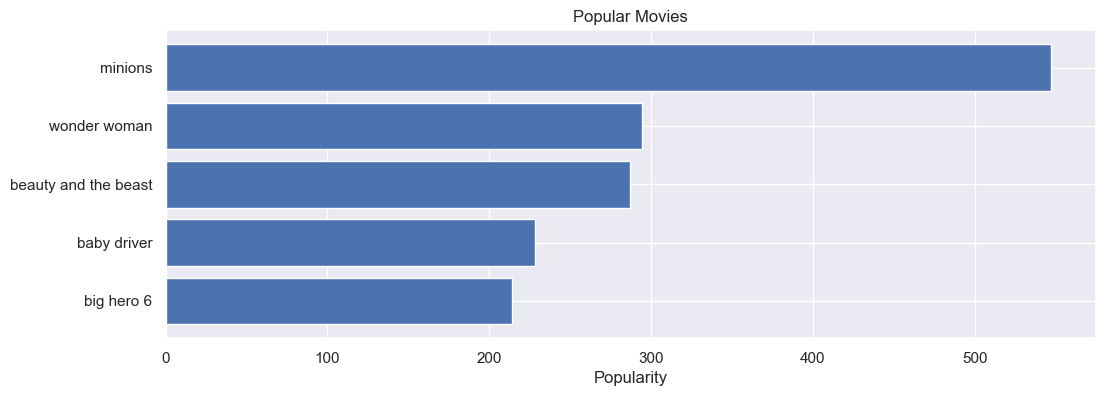

In [55]:
popularity= moviesDf.sort_values('popularity', ascending=False)

plt.figure(figsize=(12,4))

plt.barh(popularity['title'].head(5),popularity['popularity'].head(5), align='center')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

In [56]:
popularity[['title','genre','popularity']][:5]

,title,genre,popularity
30644,minions,"family, animation, adventure, comedy",547.488298
33295,wonder woman,"action, adventure, fantasy",294.337037
42124,beauty and the beast,"family, fantasy, romance",287.253654
43540,baby driver,"action, crime",228.032744
24410,big hero 6,"adventure, family, animation, action, comedy",213.849907


**El top 5 de películas con mayor popularidad fueron: minions, wonder woman, beauty and the beast, baby driver, y big hero 6.**

- Visualizamos el número de películas que se estrenaron por mes

,count,month
release_date,,
1,322,Jan
2,347,Feb
3,384,Mar
4,382,Apr
5,400,May
6,449,Jun
7,411,Jul
8,455,Aug
9,596,Sep


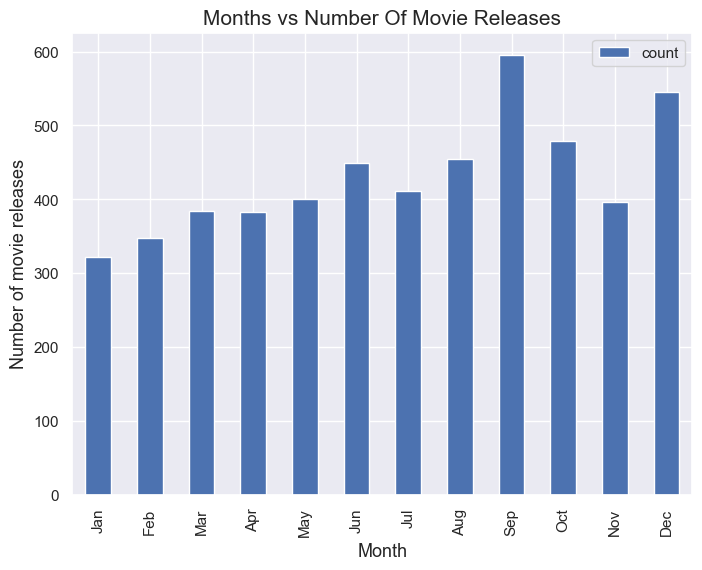

In [61]:
#extraer el número de mes de la fecha de estreno.
moviesDf['release_date'] = pd.to_datetime(moviesDf['release_date'], errors='coerce')
month_release = moviesDf['release_date'].dt.month

#contar las películas de cada mes usando value_counts().
number_of_release = month_release.value_counts().sort_index()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_release = pd.DataFrame(number_of_release)
number_of_release['month'] = months
display(number_of_release)

number_of_release.rename(columns = {'release_date':'number_of_release'},inplace=True)
number_of_release.plot(x='month',kind='bar',fontsize = 11,figsize=(8,6))

plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)
sns.set_style("darkgrid")

- Visualizamos Budget vs Revenue

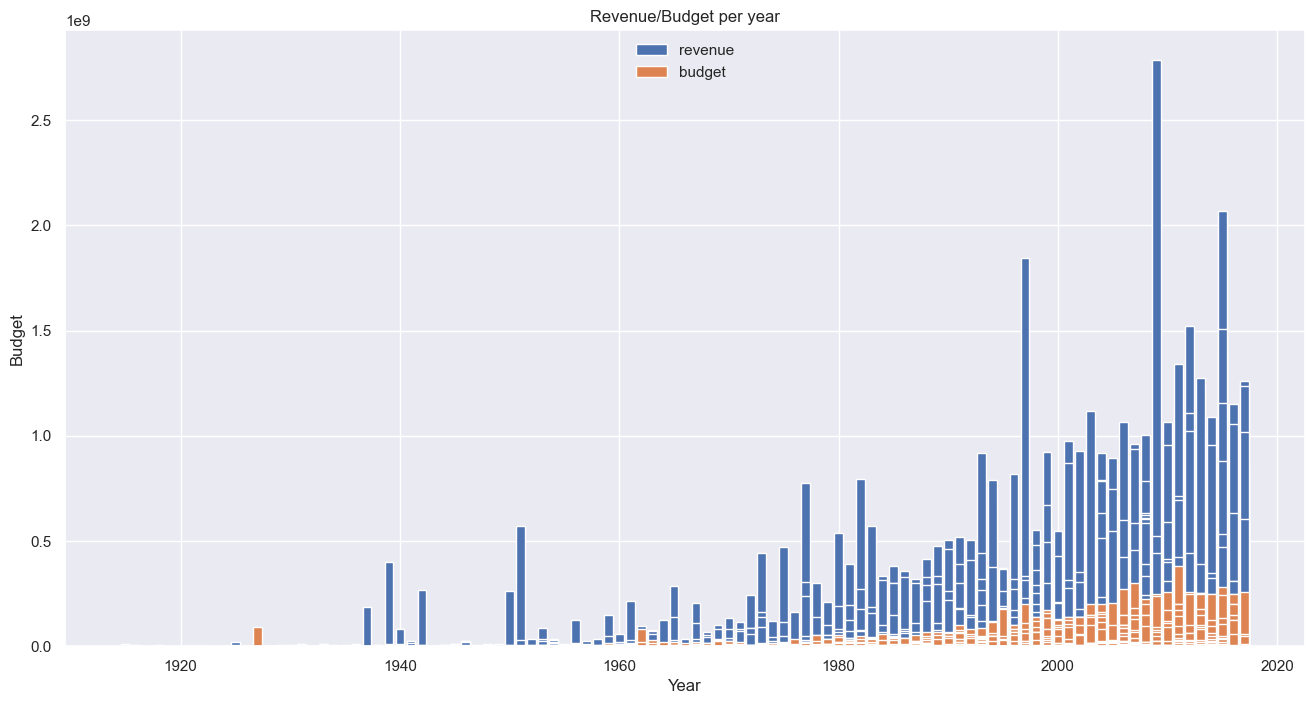

In [62]:
plt.figure(figsize=(16, 8))
plt.bar(moviesDf['release_year'], moviesDf['revenue'], label='revenue')
plt.bar(moviesDf['release_year'], moviesDf['budget'], label='budget')
plt.title('Revenue/Budget per year')
plt.xlabel('Year')
plt.ylabel('Budget')
plt.legend(loc='upper center', frameon=False)
plt.show()

### Generamos una nube de palabras

- Cada palabra de esta nube tiene un tamaño de fuente y un tono de color variables. Por lo tanto, esta representación ayuda a determinar las palabras destacadas de los títulos de las películas . Un tamaño de fuente más grande de una palabra retrata su prominencia más en relación con otras palabras en el grupo.

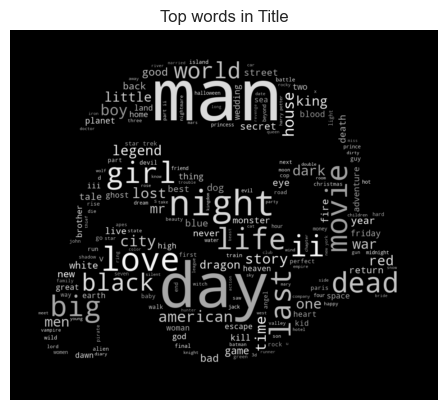

<Figure size 640x480 with 0 Axes>

In [83]:
#Nube de palabras mas comunes en el title
mask = np.array(Image.open("images/stormtrooper_mask.png"))

# adding movie script specific stopwords
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

text = ' '.join(moviesDf['title'])

wc = WordCloud(max_words=200, mask=mask, stopwords=stopwords, margin=10, random_state=1).generate(text)

# store default colored image
default_colors = wc.to_array()
plt.title("Top words in Title")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")
wc.to_file("images/a_new_hope.png")
plt.axis("off")
plt.figure()
plt.show()

** Podemos visualizar que las palabras: man, day, love, night, girl, dead tienen mayor prominencia en nuestra nube de datos.**